In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import os
from PIL import Image
# 이미지 처리 
from keras.preprocessing import image

## 파일 경로

In [2]:
base_dir = './Data' # 기본경로
train_dir = os.path.join(base_dir, 'train') # 학습 데이터 경로
test_dir = os.path.join(base_dir, 'test') # 테스트 데이더 경로

# 학습 코로나 사진
train_covid_dir = os.path.join(train_dir, 'COVID19')
# 학습 정상 사진
train_normal_dir = os.path.join(train_dir, 'NORMAL')
# 학습 폐렴 사진
train_pneum_dir = os.path.join(train_dir, 'PNEUMONIA')

# 테스트 코로나 사진
test_covid_dir = os.path.join(test_dir, 'COVID19')
# 테스트 정상 사진
test_normal_dir = os.path.join(test_dir, 'NORMAL')
# 테스트 폐렴 사진
test_pneum_dir = os.path.join(test_dir, 'PNEUMONIA')

In [3]:
# 제대로 경로 지정 됐는지 확인
train_covid_fname = os.listdir(train_covid_dir)
train_normal_fname = os.listdir(train_normal_dir)
train_pneum_fname = os.listdir(train_pneum_dir)

test_covid_fname = os.listdir(test_covid_dir)
test_normal_fname = os.listdir(test_normal_dir)
test_pneum_fname = os.listdir(test_pneum_dir)

print(train_covid_fname[:10]) # 열개만 확인
print(train_normal_fname[:10])

['COVID19(0).jpg', 'COVID19(1).jpg', 'COVID19(10).jpg', 'COVID19(101).jpg', 'COVID19(102).jpg', 'COVID19(103).jpg', 'COVID19(104).jpg', 'COVID19(105).jpg', 'COVID19(107).jpg', 'COVID19(108).jpg']
['NORMAL(0).jpg', 'NORMAL(1).jpg', 'NORMAL(100).jpg', 'NORMAL(1000).jpg', 'NORMAL(1002).jpg', 'NORMAL(1005).jpg', 'NORMAL(1006).jpg', 'NORMAL(1007).jpg', 'NORMAL(1008).jpg', 'NORMAL(1009).jpg']


In [4]:
# train 및 test 디렉토리에서 코로나, 정상, 폐렴의 이미지 총 수를 알아보기
print("전체 학습용 코로나 이미지 개수는: ", len(os.listdir(train_covid_dir)))
print("전체 학습용 정상 이미지 개수는: ", len(os.listdir(train_normal_dir)))
print("전체 학습용 폐렴 이미지 개수는: ", len(os.listdir(train_pneum_dir)))

print("-----------------------------------------------------")

print("전체 테스트용 코로나 이미지 개수는: ", len(os.listdir(test_covid_dir)))
print("전체 테스트용 정상 이미지 개수는: ", len(os.listdir(test_normal_dir)))
print("전체 테스트용 폐렴 이미지 개수는: ", len(os.listdir(test_pneum_dir)))

전체 학습용 코로나 이미지 개수는:  460
전체 학습용 정상 이미지 개수는:  1266
전체 학습용 폐렴 이미지 개수는:  3418
-----------------------------------------------------
전체 테스트용 코로나 이미지 개수는:  116
전체 테스트용 정상 이미지 개수는:  317
전체 테스트용 폐렴 이미지 개수는:  855


### 데이터 셋 갯수를 맞춰주기 위해
- 코로나는 한 파일당 21개 => 10120
- 정상은 한 파일당 7개 => 10128
- 폐렴 한 파일당 2개 => 10254


## ImageDataGenerator

In [7]:
# 랜덤시드 고정시키기
#np.random.seed(15)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=12.5, # 지정된 각도 범위내에서 임의로 회전
                                  width_shift_range=0.025, # 지정된 수평방향 이동 범위내에서 이미지 이동
                                  height_shift_range=0.025, # 지정된 수직방향 ~
                                  #shear_range=0.3, # 시계 반대방향으로 변형
                                  zoom_range=[0.95, 1.1], # 0.8 ~ 2.0 배 이미지 변화
                                  horizontal_flip=False,
                                  vertical_flip=False,
                                  fill_mode='nearest')


In [9]:
# 코로나  * 21

for j in range(len(train_covid_fname)):
    img = load_img(train_covid_dir + '/' + train_covid_fname[j])
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    
    # 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=10, save_to_dir='./Data/p_train/COVID19', save_prefix='COVID19', save_format='jpg'):
        i += 1
        if i > 21: 
            break

In [10]:
# 정상  * 7

for j in range(len(train_normal_fname)):
    img = load_img(train_normal_dir + '/' + train_normal_fname[j])
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    
    # 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=10, save_to_dir='./Data/p_train/NORMAL', save_prefix='NORMAL', save_format='jpg'):
        i += 1
        if i > 7: 
            break

In [11]:
# 폐렴  * 2

for j in range(len(train_pneum_fname)):
    img = load_img(train_pneum_dir + '/' + train_pneum_fname[j])
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    
    # 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=10, save_to_dir='./Data/p_train/PNEUMONIA', save_prefix='PNEUMONIA', save_format='jpg'):
        i += 1
        if i > 2: 
            break

## 테스트셋 보강
2000개씩으로 맞춤

In [5]:
# 랜덤시드 고정시키기
#np.random.seed(15)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# 데이터셋 불러오기
data_aug_gen = ImageDataGenerator(rescale=1./255, 
                                  rotation_range=12.5, # 지정된 각도 범위내에서 임의로 회전
                                  width_shift_range=0.025, # 지정된 수평방향 이동 범위내에서 이미지 이동
                                  height_shift_range=0.025, # 지정된 수직방향 ~
                                  #shear_range=0.3, # 시계 반대방향으로 변형
                                  zoom_range=[0.95, 1.1], # 0.8 ~ 2.0 배 이미지 변화
                                  horizontal_flip=False,
                                  vertical_flip=False,
                                  fill_mode='nearest')


In [7]:
# 코로나  * 21

for j in range(len(test_covid_fname)):
    img = load_img(test_covid_dir + '/' + test_covid_fname[j])
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    
    # 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=10, save_to_dir='./Data/p_test/COVID19', save_prefix='COVID19', save_format='jpg'):
        i += 1
        if i > 21: 
            break

In [ ]:
# 정상  * 7

for j in range(len(train_normal_fname)):
    img = load_img(train_normal_dir + '/' + train_normal_fname[j])
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    
    # 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=10, save_to_dir='./Data/p_train/NORMAL', save_prefix='NORMAL', save_format='jpg'):
        i += 1
        if i > 7: 
            break

In [ ]:
# 폐렴  * 2

for j in range(len(train_pneum_fname)):
    img = load_img(train_pneum_dir + '/' + train_pneum_fname[j])
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    i = 0
    
    # 이 for는 무한으로 반복되기 때문에 우리가 원하는 반복횟수를 지정하여, 지정된 반복횟수가 되면 빠져나오도록 해야합니다.
    for batch in data_aug_gen.flow(x, batch_size=10, save_to_dir='./Data/p_train/PNEUMONIA', save_prefix='PNEUMONIA', save_format='jpg'):
        i += 1
        if i > 2: 
            break

## 엣지 추출

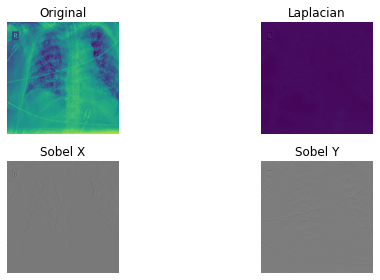

In [6]:
import cv2

img = cv2.imread(train_covid_dir + '/' + train_covid_fname[0],cv2.IMREAD_GRAYSCALE)

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_8U)

plt.figure(figsize=(9, 4))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis("off")
plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian')
plt.axis("off")
plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.axis("off")
plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.axis("off")
plt.tight_layout()
plt.show()

## 이미지 불러오기

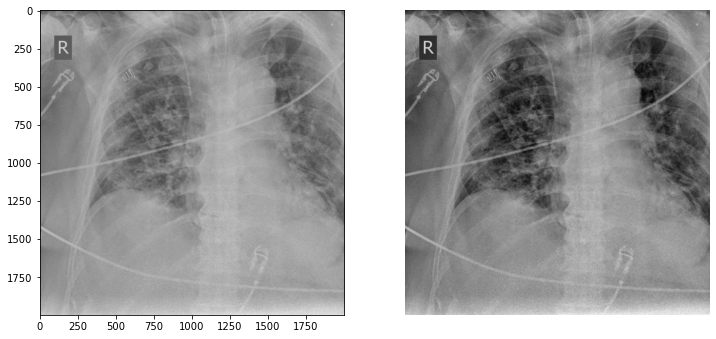

In [16]:
img = cv2.imread(train_covid_dir + '/' + train_covid_fname[0])

orig_img = img.copy()
height, width, channel = img.shape
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12,8))
plt.subplot(121),plt.imshow(img[:,:,::-1],'gray')
plt.subplot(122),plt.imshow(imgray,'gray')
plt.axis('off')
plt.savefig("Start")
plt.show()

## 이미지 전처리

<Figure size 1440x1440 with 0 Axes>

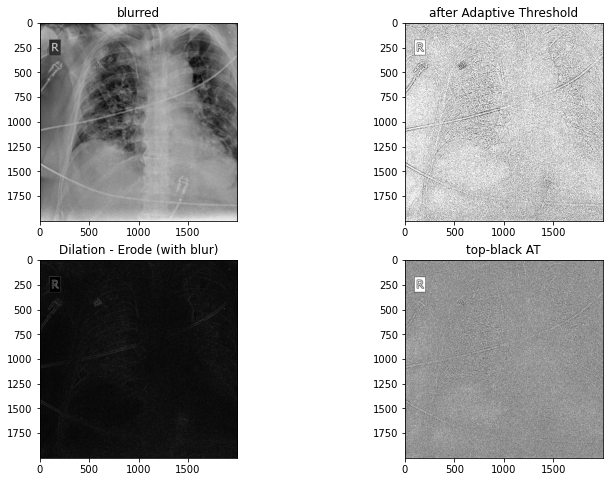

In [12]:
# Edge를 뚜렷하게 하기 위해 가우시안 블러 적용
blur = cv2.GaussianBlur(imgray,(5,5),0)

# Adaptive Threshold 적용
thr = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.figure(figsize=(20,20))

# dilation - erode with / without blur 
kernel = np.ones((3,3),np.uint8)
dil = cv2.dilate(blur,kernel,iterations=1)
ero = cv2.erode(blur,kernel,iterations=1)
morph = dil - ero

kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

topHat = cv2.morphologyEx(imgray, cv2.MORPH_TOPHAT, kernel2)
blackHat = cv2.morphologyEx(imgray, cv2.MORPH_BLACKHAT, kernel2)

imgGrayscalePlusTopHat = cv2.add(imgray, topHat)
subtract = cv2.subtract(imgGrayscalePlusTopHat, blackHat)
thr2 = cv2.adaptiveThreshold(subtract,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                             cv2.THRESH_BINARY,11,2)
plt.figure(figsize=(12,8))
plt.subplot(221), plt.imshow(blur,'gray')
plt.title("blurred")
plt.subplot(222), plt.imshow(thr,'gray')
plt.title("after Adaptive Threshold")
plt.subplot(223), plt.imshow(morph,'gray')
plt.title("Dilation - Erode (with blur)")
plt.subplot(224), plt.imshow(thr2,'gray')
plt.title("top-black AT")
plt.savefig("Preprocess")
plt.show()

## 가우시안 블러만 효과 있음

In [42]:
def auto_canny(image, sigma=0.33):
    # compute the median of the single channel pixel intensities
    v = np.median(image)
 
    # apply automatic Canny edge detection using the computed median
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
 
    # return the edged image
    return edged

In [43]:
img = cv2.imread(train_covid_dir + '/' + train_covid_fname[0])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
thresh_inv = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY_INV,39,1)
edges = auto_canny(thresh_inv)
ctrs, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
img_area = img.shape[0]*img.shape[1]
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    roi_area = w*h
    roi_ratio = roi_area/img_area
if((roi_ratio >= 0.015) and (roi_ratio < 0.09)):
        if ((h>1.2*w) and (3*w>=h)):
            cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)

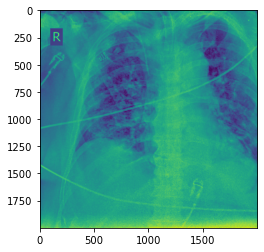

In [44]:
plt.imshow(gray)

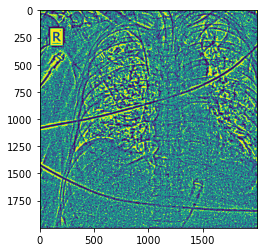

In [45]:
plt.imshow(thresh_inv)

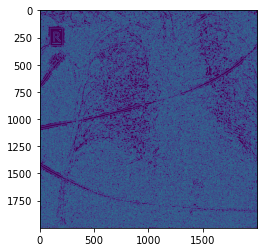

In [46]:
plt.imshow(edges)